# Lecture Week 3-2

## Topics


## Week 3-2: 


## I. Regression -- Fitting for Two Parameters (continued)

### &nbsp; &nbsp; &nbsp; &nbsp;  D) Reduced $\rm{\chi}^2$


## II. Probability and $\chi^2$

### &nbsp; &nbsp; &nbsp; &nbsp;  A) $\chi^2$, Probability Distribution Function (PDF), and Cumulative Distribution Function (CDF)
### &nbsp; &nbsp; &nbsp; &nbsp;  B) Confidence Levels



## Lab: $\chi^2$, PDF, CDF, and Confidence Levels



## I.D) Reduced $\chi^2$

## $\chi^2_{\nu} = \frac {\chi^2} {\text{DOF}}$

## Let

## $N$ = number of independent data points, and 

## $n$ = number of fitting parameters.

## Then,

## $\text{DOF} = N - n$

## Imagine if you only have two points, you will always be able to find m and b that will pass through these two points perfectly.  But you know that shouldn't happen because there will always be uncertainty.  Yes you can fit a line perfectly through 2 data points, but you are fitting for both the actual trend and the noise.  

## This happens more often than you think.  It actually has a name:  Overfitting.

## Overfitting results when the number of fitting parameter is comparable to or greater than the number of independent data points.

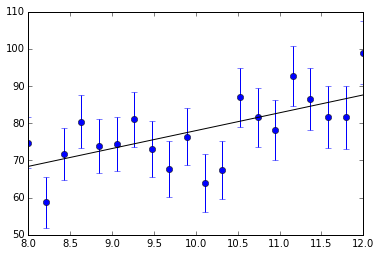

The minimum chi^2:17.6555.
The best-fit slope and intercept for the simulated data are m = 4.8000 and b = 30.0000.
(The input values are m_true = 4.2000 and b_true = 35.000000).
The reduced chi^2 is 0.9809


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
'''
Reduced chi^2 = chi^2/DOF

Note: For a sample of 20 simulated data points, you may get anything between 0.5 and 1.5.  

This is due to the small number of data points.  

'''

def f(m, b, x):
    return m*x + b

N = 20
x = np.linspace(8, 12, N)

# simulate the temperature measurements
m_true = 4.2
b_true = 35

y_true = m_true * x + b_true

# specify fractional error, say 10%, which is what occurs 
#for certain experiment. If you want to sound like a pro, 
# you say "a signal-to-noise ratio of 10". 
# (or S/N = 10).
sig_frac = 0.10
sig = y_true * sig_frac

y = y_true + np.random.randn(x.shape[0]) * sig



m_start, m_end = 0, 10
b_start, b_end = 0, 100

chi2_min = 1e6
for m in np.arange(m_start, m_end, 0.1):
    for b in np.arange(b_start, b_end, 1):
        chi2 = ((y - f(m, b, x))**2/sig**2).sum()
        if chi2 < chi2_min:
            chi2_min = chi2
            m_best = m
            b_best = b

# ms: marker size
plt.errorbar(x, y, yerr = sig, fmt = 'o', ms = 6) 
plt.plot(x, f(m_best, b_best, x), 'k-')
plt.show()

            
print('The minimum chi^2:{:.4f}.'.format(chi2_min))
print('The best-fit slope and intercept for the simulated data are \
m = {:.4f} and b = {:.4f}.'.format(m_best, b_best))
print('(The input values are m_true = {:.4f} and b_true = {:4f}).'.format(m_true, b_true))

N = len(x)
n = 2

DOF = N - n
chi2_nu = chi2_min/DOF
print("The reduced chi^2 is {:.4f}".format(chi2_nu))


## Breakout Excercise:

## Go back to the example of 20 data points with uniform variance and calculate the reduced $\chi^2$

## You may start with the following code for simulation and fitting.

In [ ]:
'''

Least square minimization with uniform variance: Grid search.

Note: for some simulation, I don't exactly get the input values of m_true and b_true.
'''
N = 20

x = np.linspace(8, 12, N)
m_true = 4.2
b_true = 35

y_true = m_true * x + b_true 
sig = 1.2
y = y_true + np.random.randn(x.shape[0]) * sig

# Grid search
m_start, m_end = 0, 10
b_start, b_end = 0, 100

rss_min = 1e6
for m in np.arange(m_start, m_end, 0.1):
    for b in np.arange(0, 100, 1):
        rss = ((y - f(m, b, x))**2).sum()
        if rss < rss_min:
            rss_min = rss
            m_best = m
            b_best = b
            
print('The minimum RSS:{:.4f}.'.format(rss_min))
print('The best-fit slope and intercept for the simulated data are \
m = {:.4f} and b = {:.4f}.'.format(m_best, b_best))
print('(The input values are m_true = {:.4f} and b_true = {:4f}).'.format(m_true, b_true))


## We can go back further to the case of fitting for one parameter.  Remeber: 50 thermometers measuring room temperature at the same time.  

We can easily calculate $\chi^2_{\nu}$.  First of all,

$$\chi^2 = \sum_{i} { \frac {[t_i - \langle t \rangle]^2} {\sigma_i^2} } \tag {4}$$

Let $N$ be the number of independent data points; the degree of freedom is:

$$ \text{DOF} = \nu = N - 1 $$

We need to subtract 1 because there is *one* fitting parameter.  Then

$$\chi^2_{\nu} = \frac{\chi^2} {N-1} \tag {5}$$

(Again, in the case of only one data point, it's meaningless to compute the average -- the simplest case of overfitting: a horizontal line can be shifted up and down to pass exactly through any one point!)

## In this simplest of all cases, how do we understand why $\chi^2_{\nu}$ should be roughly 1:


If our assumption that noise follows a Gaussian distribution is right, then roughly 2/3 of the times each of the terms

$$\frac{ t_i - \langle t \rangle} {\sigma_i}  \tag{6} $$


is less than 1, and 1/3 of the times they are greater than 1.  But in the sum of $\chi^2$, the terms we are summing is the square of the expression in (6):

$$\left[ \frac{ t_i - \langle t \rangle} {\sigma_i} \right]^2 \tag{7} $$


When a number less than 1 is squared, it's even smaller, but there is a lower bound, 0.  When a number larger than 1 is squared, it's even larger, but there is no bound from above.  So even though only ~1/3 of the times will a term in the form of (7) be larger than 1, they have longer "lever arms" from the number 1.  If there are a large number of terms, those that are greater than 1 exactly balance those that are less than 1.  Thus the average of all the terms in $\chi^2$ (eqn (4)) is 1.  This is essentially what the reduced $\chi^2$ calculates: the average of the terms in the form of (7).  (You may wonder if for computing the average we need $N$ in the denominator of eqn (5) instead of $N-1$.  First of all, if $N$ is large, it makes little difference whether it's $N$ or $N-1$.  For small $N$, well, $N-1$ is correct -- if you actually do the math.).

This is not a proof but rather an intuitive way for you understand why reduced $\chi^2$ should be around 1.

One other way of understanding eqn (4) or the expression in (7): We are basically trying to get a sense of how big the deviations are from our best estimate of the temperature.  It makes sense to measure the deviation for each data point in unit of $\sigma_i$.  

## Remember we started this whole discussion wanting to calculate and maximize this probability (again using temperature measurement as the example):

## $$P(T|D)\text{,} \tag{8}$$

## and hope to obtain, given data $D$, the most likely value for the true temperature.

## But it turns out we don't know how to calculate the probability in (8).  Instead we calculate and maximize this probability 

## $$P(D|T)\text{,} \tag{9}$$

## and obtain the temperature value for which the data $D$ is the most likely. 

## We then assume the temperature value that maximizes (9) also maximizes (8).

## For one temperature measurement, the probability is (See Week2-2, $\S$ II.A)),


## $$P(t; T) = \frac{1}{\sqrt{2\pi\sigma}} e^{ -\frac{ (t - T)^2 } { 2\sigma^2 }} \tag{10}$$	

## For a data set of $N$ measurements,


## $P(D|T) = P(t_1, t_2, t_i,..., t_N; T) = P(t_1; T)P(t_2; T)...P(t_i; T)...P(t_N; T)$ 
## $\hspace{2.75em} = e^{\left[ -\frac{(t_1-T)^2}{2\sigma^2}-\frac{(t_2-T)^2}{2\sigma^2}-...\frac{(t_i-T)^2}{ 2\sigma^2}-...-\frac{(t_N-T)^2}{2\sigma^2} \right]}$

## Or,

## $$P(D|T) = Ae^{-\chi^2/2} \text{,} \tag{11}$$

##where $A = \left( \frac{1}{\sqrt{2\pi\sigma}}\right)^N$ (See $\S$ II.D) of Notebook Week2-2.)

## Eqn (11) is the probability of how likely the data set $D = \{t_i\}$ is going to occur given the temperture is $T$.  When it is integrated over all possible values for $\{t_i\}$, we should get 1, by definition.

## But we will now reinterpret this as a probability for $T$ -- remember we are saying $P(D|T)$ is the same as $P(T|D)$ -- so we will replace the L.H.S. of (11) by $P(T|D)$.

## For the R.H.S. of (11), what's traditionally done is to divide it by $e^{-\chi_\text{min}^2/2}$.  So now we have:

## $$P(T|D) \propto e^{-\Delta\chi^2/2} \text{,} \tag{12}$$

## where $\Delta\chi^2 = \chi^2 - \chi^2_{\text{min}}$.

## The proportionality constant will be determined by requiring that this probability integrated over all possible values of $T$ is 1.

## Computationally, you integrate over a large enough range of $T$ around $T_{best}$ and require the result to be 1.


## This an example of one fitting parameter ($T$).

## In the case of 2 fitting parameters:

## Given $m$ and $b$, the probability of the $i$th measurement being $y_i$ is

## $$\frac{1}{\sqrt{2\pi\sigma}} e^{\frac {[y_i - f(x_i)]^2} {\sigma^2}} = \frac{1}{\sqrt{2\pi\sigma}} e^{ \frac{[y_i - (mx_i + b)]^2}{\sigma^2} }  \tag{13}$$


## and thus, 

## $P(D|[m, b]) = P(y_1; [m, b])P(y_2; [m, b])...P(y_i; [m, b])...P(y_N; [m, b])$ 
## $\hspace{4.3em} = Ae^{\sum_{i=1}^N {\frac{[y_i - (mx_i + b)]^2}{2\sigma^2}}}$

## Or,

## $$P(D|[m, b]) = Ae^{-\chi^2/2}\text{,} \tag{14}$$

## where, again, $A = \left( \frac{1}{\sqrt{2\pi\sigma}}\right)^N$

## Eqn (14) is the probability of how likely the data set $D = \{y_i\}$ going to occur given the slope and intercept are $[m, b]$.  When it is integrated over all possible values for $\{y_i\}$, we should get 1, by definition.

## But we will now reinterpret this as a probability for $[m, b]$.

## So again, replacing the L.H.S. of (14) by $P([m, b]|D)$ and dividing the R.H.S. by $e^{-\chi_\text{min}^2/2}$, we have:

## $$P([m, b]|D) \propto e^{-\Delta\chi^2/2} \text{,} \tag{15}$$

## The proportionality constant will be determined by requiring that this probability integrated over all possible values of $m$ and $b$ is 1.

## Computationally, you integrate over a large enough area in the $m\text{-}b$ space around the point $(m_{best}, b_{best})$ and require the result to be 1.

# The take away:

## The probability of a model, characterized by a set of parameters, being the correct model for reality is proportional to $e^{-\Delta\chi^2/2}$.

## For the one-parameter example,

## $$P(\text{ model }|\text{ data })= P(T|D) \propto Ae^{-\Delta\chi^2/2} .$$

## For the two-parameter example, 

## $$P(\text{ model }|\text{ data }) = P([m, b]|D) \propto e^{-\Delta\chi^2/2}.$$

## In general,

## $$P(\text{ model }|\text{ data }) \propto e^{-\Delta\chi^2/2} \text{.} \tag{16}$$

## If your model has $n$ parameters, $\text{model}(p_1, p_2,..., p_n)$, the proportionality constant in (16) will be determined by requiring that this probability integrated over all these parameters is 1.


## N.B.: The quantity in the exponent in (16) is $\Delta\chi^2$ and not $\Delta\chi^2_{\nu}$!


## OK, let's do it!

## ... but first a couple of useful numpy functions and methods.

In [ ]:
'''

Two numpy array methods: 

cumsum and concatenate

'''
a = np.linspace(1, 10, 10)
a_cumsum = a.cumsum()
print(a)
print(a_cumsum)


b = np.linspace(-1, -10, 10)
# Note: what goes into np.concatenate has to be a tuple
c = np.concatenate((a, b))
print(c)

In [ ]:
'''

plot looks weird because:

- Python connects the plotted points according the order of the indpendent variable.
- If the x array is not ordered, you will see zig-zag lines.

'''

# arr = np.random.rand(4)
x_arr = np.array([0.9, 0.2, 0.4, 0.5])
y_arr = x_arr**2
plt.plot(x_arr, y_arr)
plt.show()


In [ ]:
'''numpy.argsort'''

# arr = np.random.rand(4)
x_arr = np.array([0.9, 0.2, 0.4, 0.5])
y_arr = x_arr**2
# sorted_idx tells you the position of each element in the sorted array
sorted_idx = np.argsort(x_arr)

x_arr_sorted = x_arr[sorted_idx]
y_arr_sorted = y_arr[sorted_idx]

plt.plot(x_arr_sorted, y_arr_sorted)
print('original x_arr: {}'.format(x_arr))
print('sorted_idx: {}'.format(sorted_idx))
# sorted in ascending order
print('sorted x_arr: {}'.format(x_arr_sorted))



## The idea is that as the array x_arr gets sorted, the indices of the elements are also sorted.

## argsort gives you the order of the original indices after the sorting.

## Since 0.9 had the original index of 0, and after sorting 0.9 become the last element, so 0 becomes the last element of what argsort returns.

## You can then think of sorted_idx (what's returned by argsort) as a set of instructions.  In this case:

- Take the original 0th element and put it in the 3rd (last) place
- Take the original 1st element and put it in the 0th place
- Take the original 2nd element and put it in the 1st place
- Take the original 3rd element and put it in the 2nd place.

## By doing 

x_arr_sorted = x_arr[sorted_idx]

## you are carrying out this set of instructions.

## Similarly by doing 

y_arr_sorted = y_arr[sorted_idx]

## you are sorting y_arr in such a way that each element in y_arr_sorted corresponds to the right element in x_arr_sorted.

## You can think of applying argsort to x_arr as a way to get the instructions to sort x_arr, and then you can apply the set of instructions to both x_arr and y_arr so that after sorting, each element in the x array still corresponds to the right element in the y array.

## Short Breakout Exercise (one-liner, a bit of a brain teaser...)

## If someone gives you an array that has been sorted in ascending order 

x_arr_sorted = [ 0.2  0.4  0.5  0.9]

## and the sorted indices

sorted_idx = [1 2 3 0]

## How do you get the original array (let's call it arr) back?

## Before I show you the solution...

## When we sorted x_arr into an ascending order, the indices or x_arr got scrambled and are no longer squential.

## Now you want to put these indices back in the original order, that is, the sequential order.  Another way of saying that is to order the indices in idx_ordered:

##$$ [1\, 2\, 3\, 0]  \rightarrow [0\,1\,2\,3]$$


## Also, note that there is a one-to-one correspondence between sorted_idx and x_arr_sorted (the original index of every element in x_arr_sorted is stored in sorted_idx).


##\begin{array}{llll}
[\mkern-18mu&1 &2 &3 &0]\\
&\downarrow &\downarrow &\downarrow &\downarrow \\
[& 0.2 &0.4 &0.5 &0.9] \\
\end{array}


## So...let's sort sorted_idx back into sequential order and get the set of instructions to accomplish that. 

## Well, argsort does exactly that if we apply it to sorted_idx.

## Then impose that set of instructions on x_arr_sorted, and you would have gotten the original array back. And we know the way to obtain the instruction is by applying np.argsort.

## In summary:

## we apply np.argsort to sorted_idx to get the instruction and then impose the instruction on x_arry_sorted.



## Lab: $\chi^2$, PDF, CDF, and Confidence Levels

## Lab Breakout Exercise 1:

## First, the simplest problem, a one-parameter model:

-  ## Simulate 2000 data points -- Gaussian random numbers with mu = 10. and sigma = 2.

-  ## Plot histogram.

-  ## Calculate chi^2; find the minimum chi^2.

-  ## Get Probability Distribution Function (PDF) from $e^{-\Delta\chi^2/2}$ .

-  ## Plot PDF.



## Lab Breakout Exercise 2:

- ## Find the Cumulative Distribution Function (CDF) by using the numpy array method .cumsum

- ## Then plot the CDF

## Lab Breakout Exercsise 3
-  ## Calculate the "one-sided" CDF from the peak of the PDF. 
-  ## Then use this CDF to find the $1\text{-}\sigma$ and $2\text{-}\sigma$ of the distribution.

# End of Week 3-2